In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants 
from scipy.constants import pi, c, hbar, epsilon_0, e, m_e, m_p, N_A, k

from fig_config import (
    add_grid,
    figure_features,
)  # <--- import customized functions

figure_features()



In hydrodynamics the KHI for a (continuous) vortex sheet (i.e. a tangential discontinuity between two parallel flows $v_1$ and $v_2$) in an incompressible inviscid fluid of constant density and without gravity is known to have a dispersion relation of the form

$$\omega (k_H)= \frac{v_1+v_2}{2}k_H \pm i \frac{v_1-v_2}{2}k_H$$

where $k_H$ is the wavevector of the perturbation along the discontinuity, i.e. parallel to the flows. This result is modified if, instead of a tangential discontinuity, a finite-width shear layer is present; for example, for a piecewise continuous profile that is constant for $\vert y \vert > \delta $ and changes linearly for $ - \delta \leq y \leq \delta $ the dispersion relation becomes

$$\omega_{KH} (k_H) = \frac{v_1+v_2}{2} k_H \pm i \frac{v_1-v_2}{4 \delta} \sqrt{e^{-4 k_H \delta} - (2k_h\delta-1)^2}$$

At low wavenumbers kH the instability rate increases linearly, as in the zero-thickness case (12), while at higher transverse wavenumbers there is a decrease and above $k_H \delta \sim 0.6 $ the instability is quenched.

So, we will plot this for our cases. In our case $v_1=-v_2= \frac{\Delta v}{2}$

In [3]:
def im_omega(deltav,k):
    return deltav*k/2 

def im_omega_kh(delta, deltav, k):
    return  1j * deltav / (4 * delta) * np.sqrt(np.exp(-4*k*delta)-(2 * k * delta - 1)**2)

def delta(xi,c_s,delta_v):
    return xi * (1 + c_s / delta_v)


So, now we can plot both our expresions

/var/folders/bj/ch6vb_9j551gr6pn5t7t2c0w0000gn/T/ipykernel_7015/501187801.py:5: RuntimeWarning: invalid value encountered in sqrt
  return  1j * deltav / (4 * delta) * np.sqrt(np.exp(-4*k*delta)-(2 * k * delta - 1)**2)


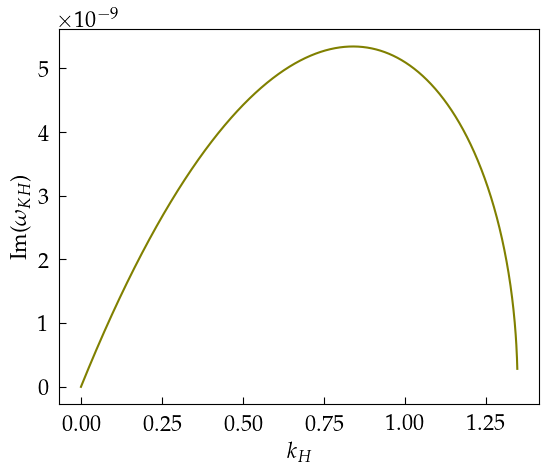

In [34]:


k_h = np.linspace(0, 10, 10000)

v = deltav / 2
m = 12 * 1.66053873E-27 
K = m / hbar * v - k_h
c_s = 2E-8
deltav = 1.26 * c_s 
xi = hbar / (m * c_s)
delta_av = delta(xi,c_s,deltav)
fig = plt.figure()
ax = plt.axes()
 
#plt.plot(k_h, im_omega(deltav, k_h), label='Im($\omega$)')
plt.plot(k_h, np.imag(im_omega_kh(delta_av, deltav,k_h)), linewidth = 1.5,  c = 'olive')
plt.xlabel('$k_H$')
plt.ylabel('Im($\omega_{KH}$)')
plt.show()


Now, we will plot the velocity profile 

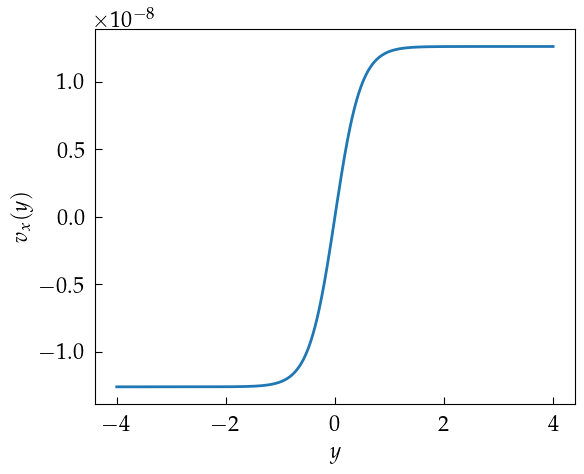

In [35]:
def vx(y):
    return deltav / 2 * np.tanh(y/delta_av)

#Now we plot it,

fig = plt.figure()
ax = plt.axes()
y = np.linspace(-4, 4, 1000)
plt.plot(y, vx(y), label='vx(y)')
plt.xlabel('$y$')
plt.ylabel('$v_x(y)$')
plt.show()
